In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from assignments.logistic_regression import X_train



In [4]:
data = pd.read_csv('D:\\Data-science\\Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [16]:
data = data.drop_duplicates()
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
numeric_features = data.drop(columns=["animal name", "type"])


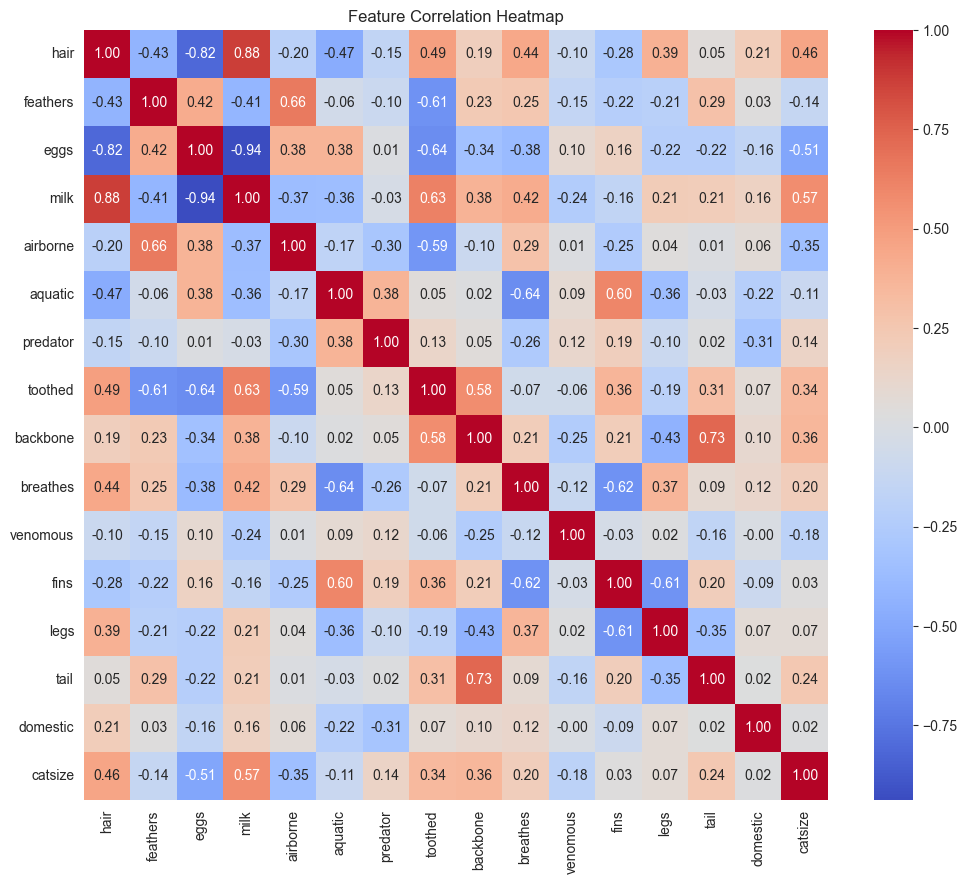

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

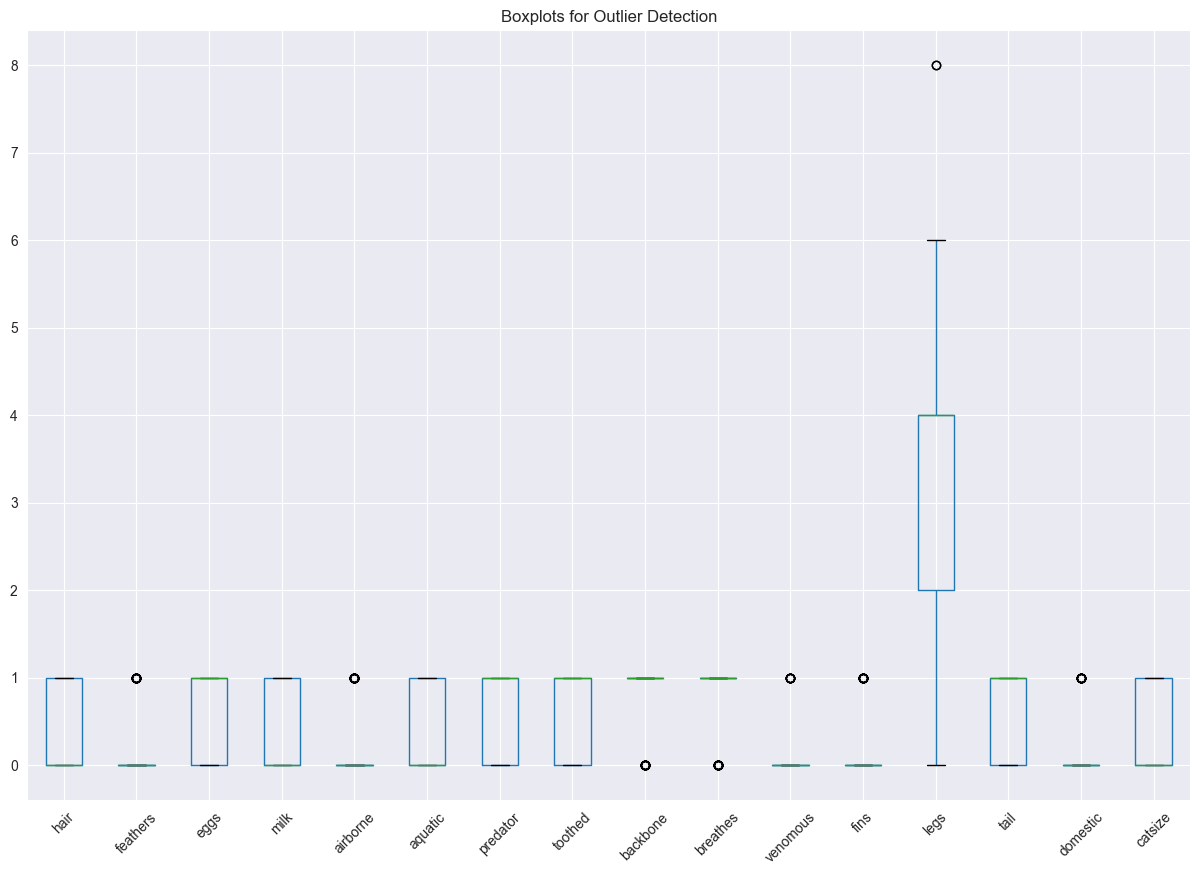

In [10]:
plt.figure(figsize=(15, 10))
numeric_features.boxplot(rot=90)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [19]:
## finding outline values
Q1 = data['legs'].quantile(0.25)
Q3 = data['legs'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower, upper)
outliers = data[(data['legs'] > lower) & (data['legs'] < upper)]
print("Outliers in 'legs':")
print(outliers[['animal name', 'legs']])


-1.0 7.0
Outliers in 'legs':
    animal name  legs
0      aardvark     4
1      antelope     4
2          bass     0
3          bear     4
4          boar     4
..          ...   ...
96      wallaby     2
97         wasp     6
98         wolf     4
99         worm     0
100        wren     2

[99 rows x 2 columns]


In [20]:
print("Final summary")
print(outliers.describe())


Final summary
            hair   feathers       eggs       milk   airborne    aquatic  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean    0.434343   0.202020   0.585859   0.414141   0.242424   0.353535   
std     0.498193   0.403551   0.495080   0.495080   0.430730   0.480500   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        predator    toothed   backbone   breathes   venomous       fins  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean    0.545455   0.616162   0.838384   0.797980   0.070707   0.171717   
std     0.500464   0.488794   0.369972   0.403551   0.257639   0.379054   
min     0.

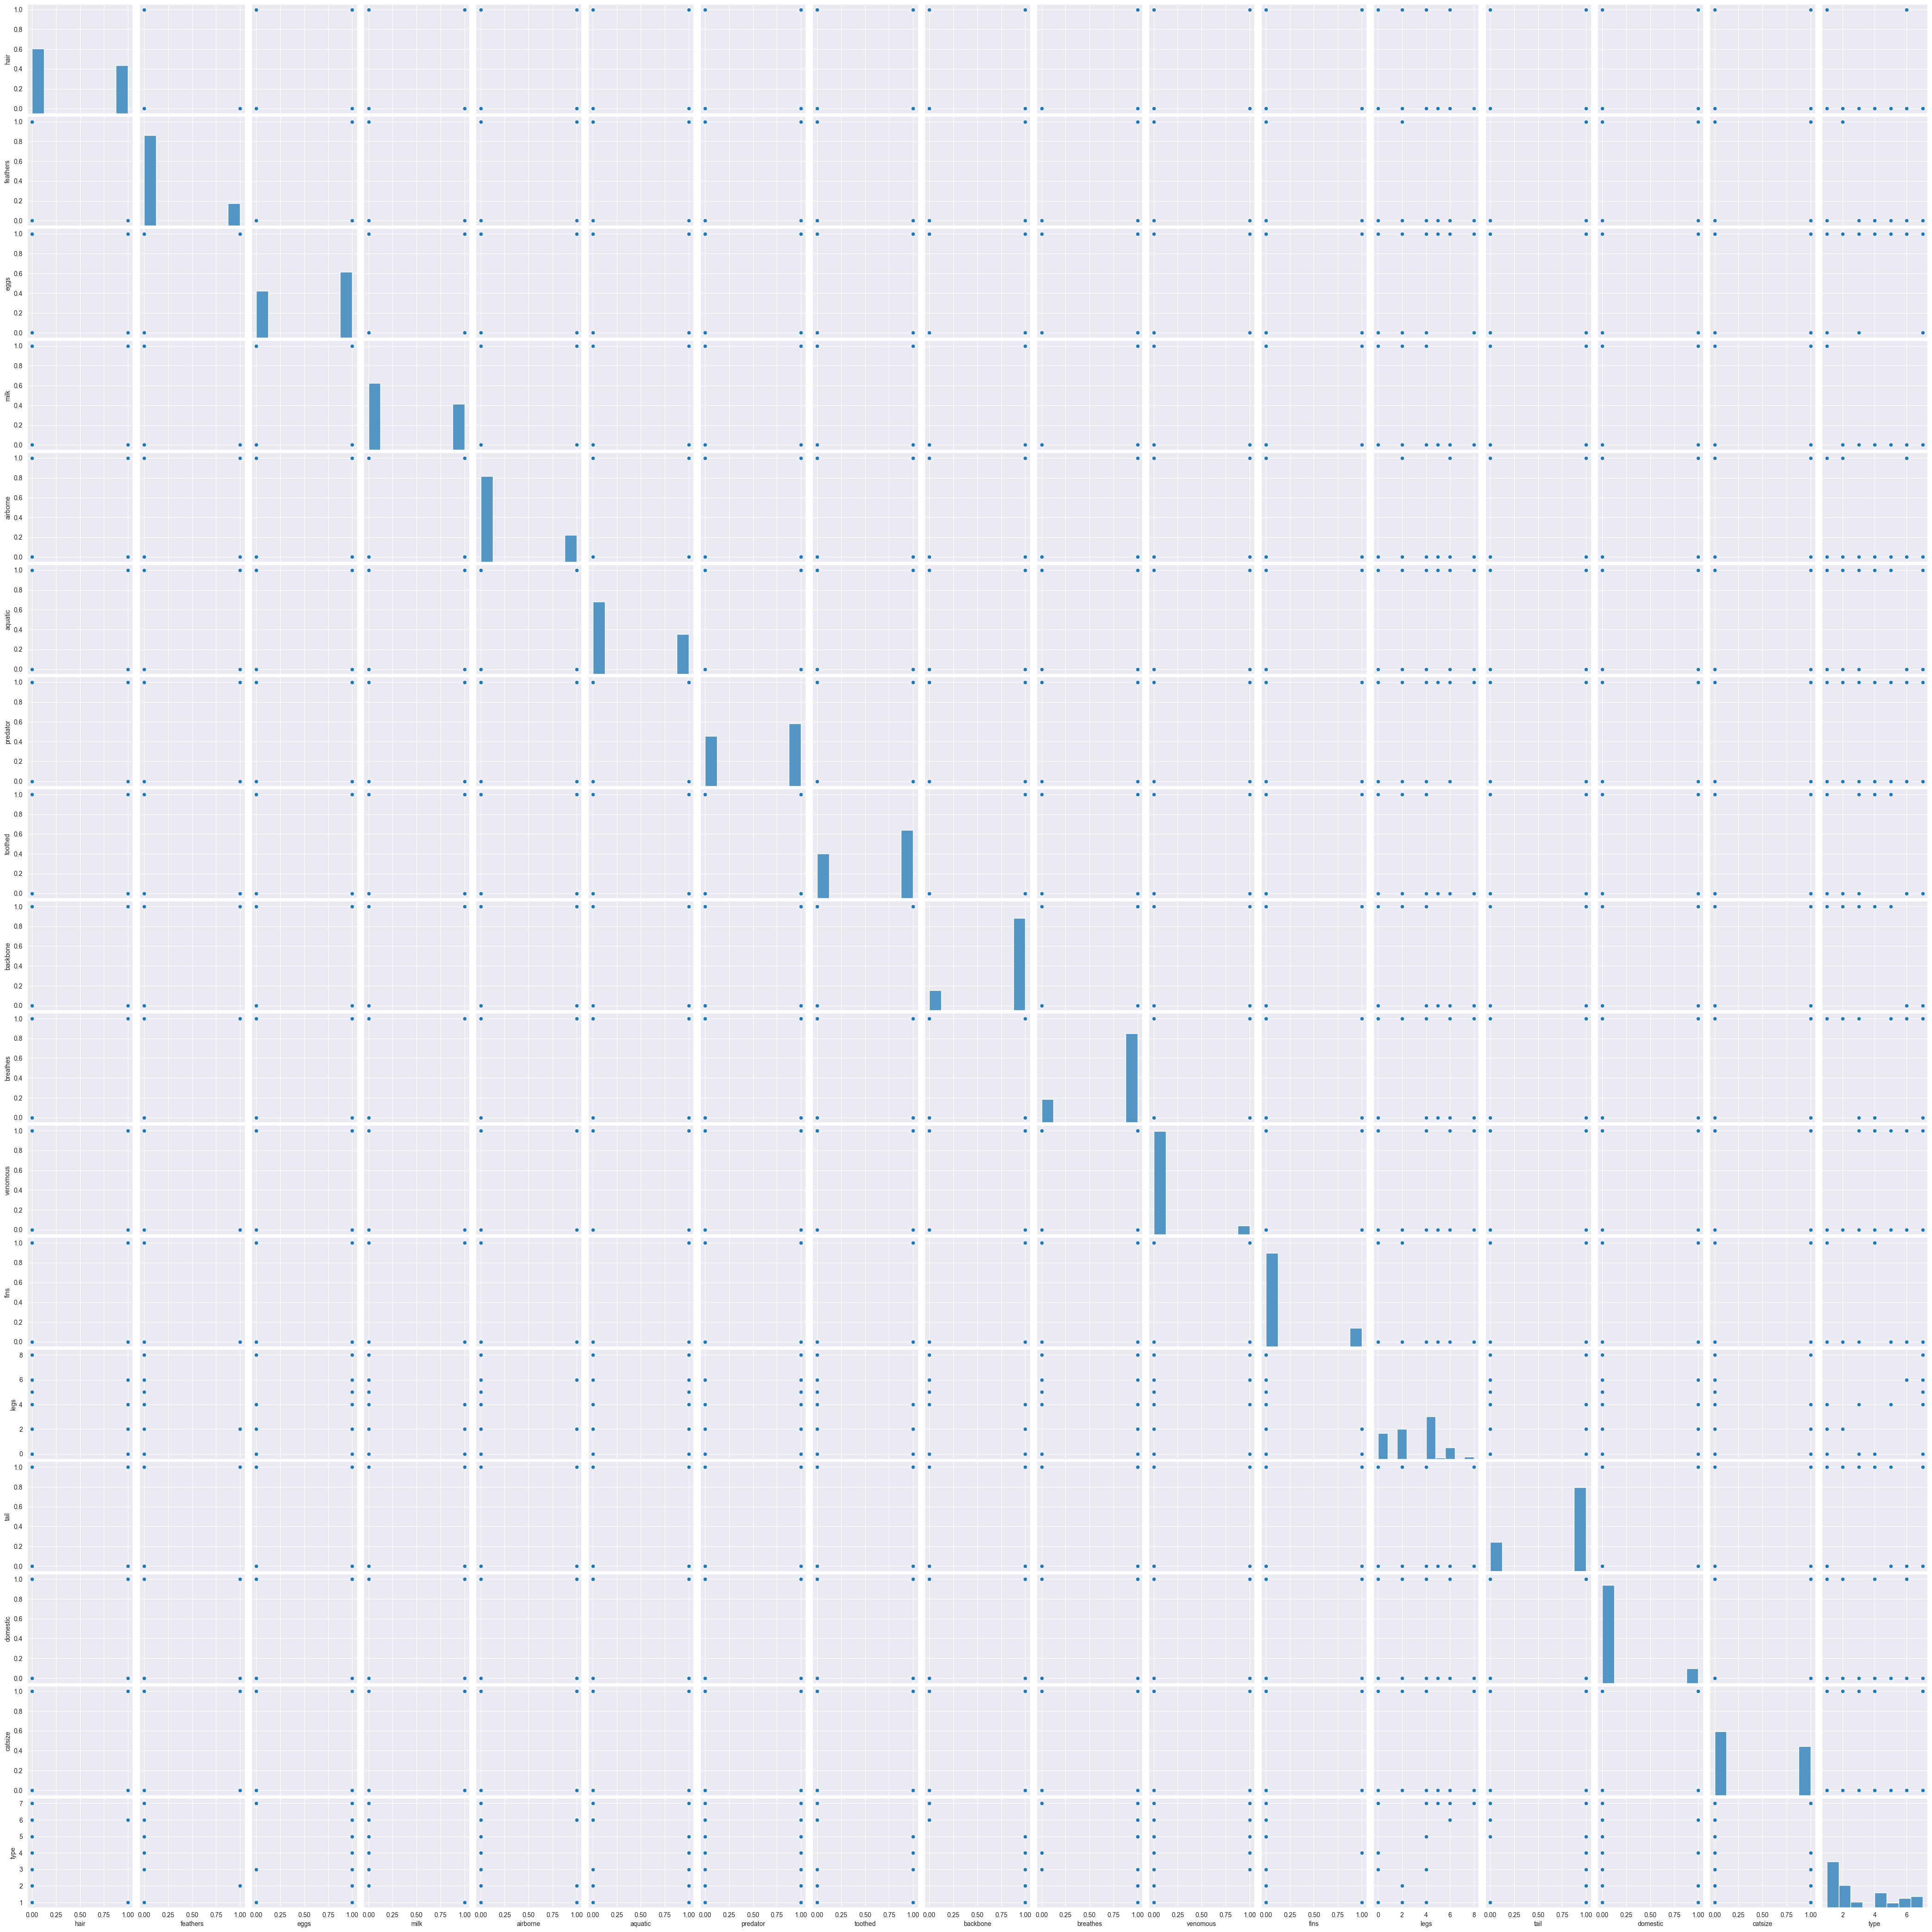

In [8]:
sns.pairplot(data)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [22]:
X = data.drop(columns=["animal name", "type"], axis=1)
Y = data['type']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macr

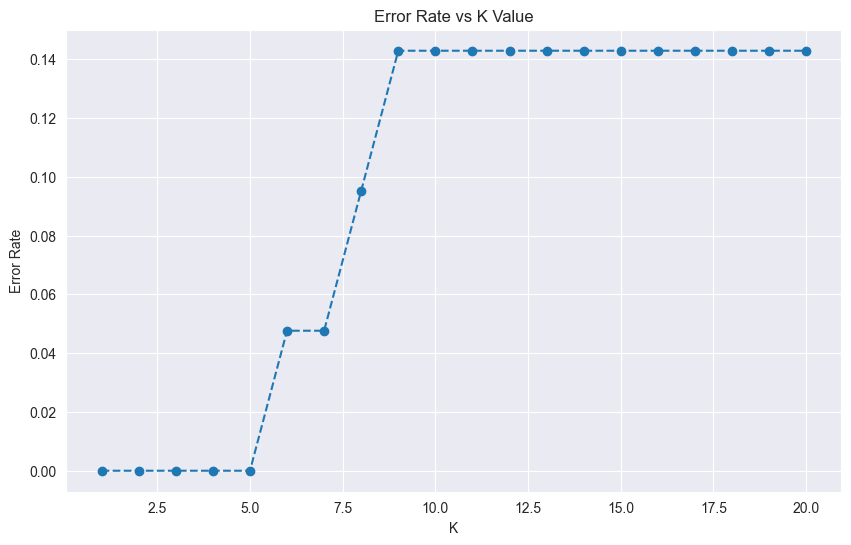

In [32]:
import matplotlib.pyplot as plt

error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform',algorithm='auto', leaf_size=30,p=2, metric='minkowski', 
    n_jobs=None)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    report = classification_report(y_test, pred_k, zero_division=0)
    print(f"report: {report}")
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)
print(error_rates)
# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### Best fit K values {1,2,3,4,5}

In [35]:
### Performance Tuning KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [36]:
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}
Best cross-validation accuracy: 0.9625


##### What are the key hyperparameters in KNN?  



In K-Nearest Neighbors (KNN), the key hyperparameters that influence the model's performance are:<br/>
1. Number of Neighbors (k)
--- small K --> (low bias, high variance).
--- Large K --> (high bias, low variance).
2. Distance Metric
---Euclidean distance 
---Manhattan distance
---Minkowski distance
--Cosine similarity
3. Weights
---Uniform,distance, custom function
4. Algorithm
-- Auto
--ball_tree
--kd_tree
--brute
5. Leaf Size
6. p Parameter 


#### What distance metrics can be used in KNN?

In K-Nearest Neighbors (KNN), several distance metrics can be used to measure similarity between data points. The choice of metric can significantly affect performance, especially in high-dimensional or specialized data.
<br/>
<ui>Euclidean Distance
<li> formula : squareRoot(sgma(i=0,n)(x-y))**2)</li></ui>
<ui>Manhattan Distance
<li>formula: sgma(i=0,n)(|x-y|)</li></ui>
<ui>Cosine Similarity (often used as a distance by computing (1-Cosine similarity)
<li>formula: x.y /||x||.||y|| </li></ui>
<ui>Minkowski Distance
<li>formula: (sgma(i=0,n) |x-y|**p)**1/p</li></ui>
